## Import TensorFlow and other libraries

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [187]:
#dataset
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

After downloading, you should now have a copy of the dataset available. There are 3,670 total images:

In [188]:
#Total Number of images in Dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


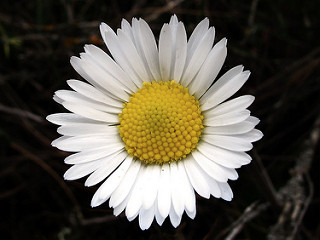

In [189]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

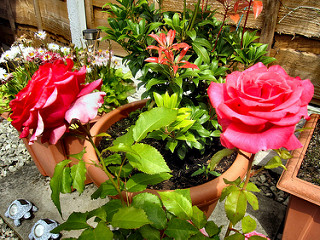

In [190]:
rose = list(data_dir.glob('roses/*'))
PIL.Image.open(str(rose[0]))

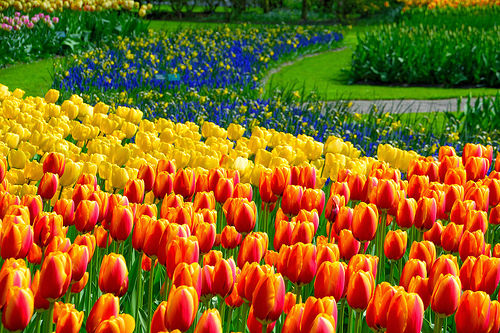

In [191]:
tulip = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulip[0]))

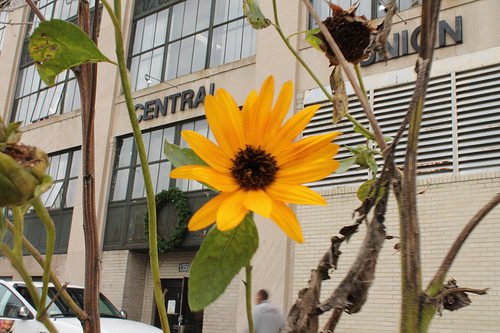

In [192]:
sunflower = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflower[0]))

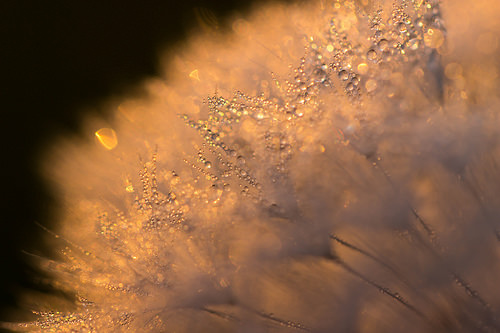

In [193]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

In [194]:
#loader parameters
batch_size = 35
img_height = 200
img_width = 200

In [195]:
#Prepairing Training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=143,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


In [196]:
#Preparing validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=143,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [197]:
#determining 5 plant types
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


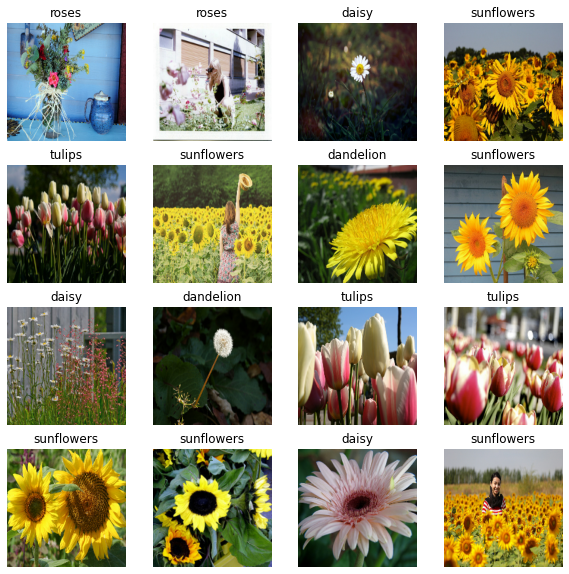

In [198]:
#Taking first 16 images from dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [199]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(35, 200, 200, 3)
(35,)


In [200]:
#configuring dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [201]:
#Standarizinn dataset from rgb values to 0 & 1
normalization_layer = layers.Rescaling(1./255)

In [202]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [203]:
#Model Creation

num_classes = len(class_names)
#CNN with 3 blocks
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  #activation function
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [204]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [205]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 50, 50, 64)      

In [206]:
#Model Training
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
74/74 [==============================] - 7s 87ms/step - loss: 1.3820 - accuracy: 0.4118 - val_loss: 1.1138 - val_accuracy: 0.5095
Epoch 2/15
74/74 [==============================] - 5s 61ms/step - loss: 1.0382 - accuracy: 0.5796 - val_loss: 1.0365 - val_accuracy: 0.5867
Epoch 3/15
74/74 [==============================] - 4s 60ms/step - loss: 0.8963 - accuracy: 0.6575 - val_loss: 0.9652 - val_accuracy: 0.6176
Epoch 4/15
74/74 [==============================] - 4s 59ms/step - loss: 0.7286 - accuracy: 0.7287 - val_loss: 0.9195 - val_accuracy: 0.6612
Epoch 5/15
74/74 [==============================] - 4s 59ms/step - loss: 0.5159 - accuracy: 0.8186 - val_loss: 1.1195 - val_accuracy: 0.6203
Epoch 6/15
74/74 [==============================] - 4s 60ms/step - loss: 0.3112 - accuracy: 0.8937 - val_loss: 1.1362 - val_accuracy: 0.6467
Epoch 7/15
74/74 [==============================] - 4s 60ms/step - loss: 0.1747 - accuracy: 0.9471 - val_loss: 1.3296 - val_accuracy: 0.6503
Epoch 8/15
74

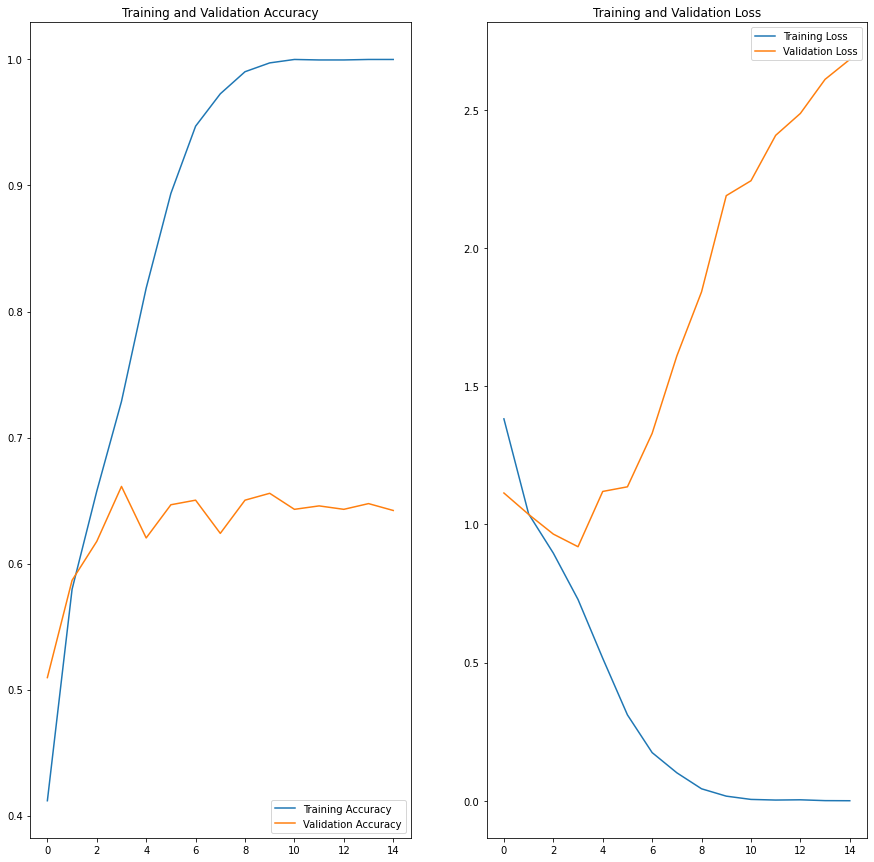

In [207]:
#Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [208]:
#augmenting data to prevent overfitting
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

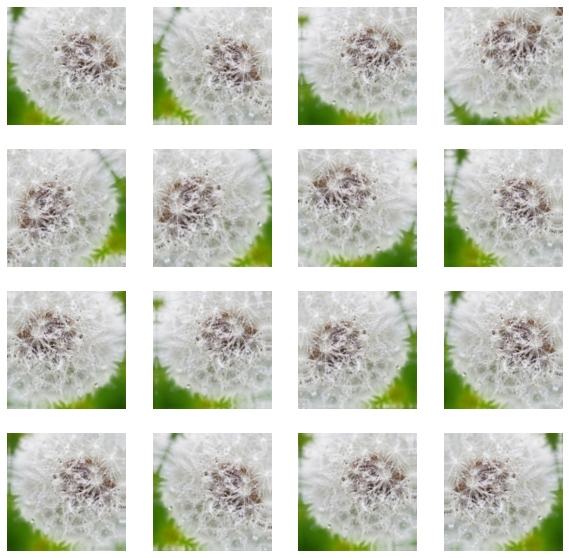

In [209]:
#result of augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [210]:
#drop out to reduce overfitting
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [211]:
#compile & train model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [212]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 200, 200, 3)       0         
                                                                 
 rescaling_17 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                

In [213]:
#Training after reducing overfitting
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
74/74 [==============================] - 6s 71ms/step - loss: 1.2812 - accuracy: 0.4371 - val_loss: 1.1054 - val_accuracy: 0.5640
Epoch 2/20
74/74 [==============================] - 5s 67ms/step - loss: 1.0483 - accuracy: 0.5886 - val_loss: 0.9522 - val_accuracy: 0.6322
Epoch 3/20
74/74 [==============================] - 5s 67ms/step - loss: 0.9616 - accuracy: 0.6181 - val_loss: 0.9148 - val_accuracy: 0.6503
Epoch 4/20
74/74 [==============================] - 5s 67ms/step - loss: 0.8922 - accuracy: 0.6578 - val_loss: 0.9223 - val_accuracy: 0.6549
Epoch 5/20
74/74 [==============================] - 5s 67ms/step - loss: 0.8614 - accuracy: 0.6606 - val_loss: 0.8437 - val_accuracy: 0.6721
Epoch 6/20
74/74 [==============================] - 5s 67ms/step - loss: 0.8098 - accuracy: 0.6851 - val_loss: 0.8820 - val_accuracy: 0.6730
Epoch 7/20
74/74 [==============================] - 5s 68ms/step - loss: 0.7876 - accuracy: 0.6929 - val_loss: 0.7926 - val_accuracy: 0.7121
Epoch 8/20
74

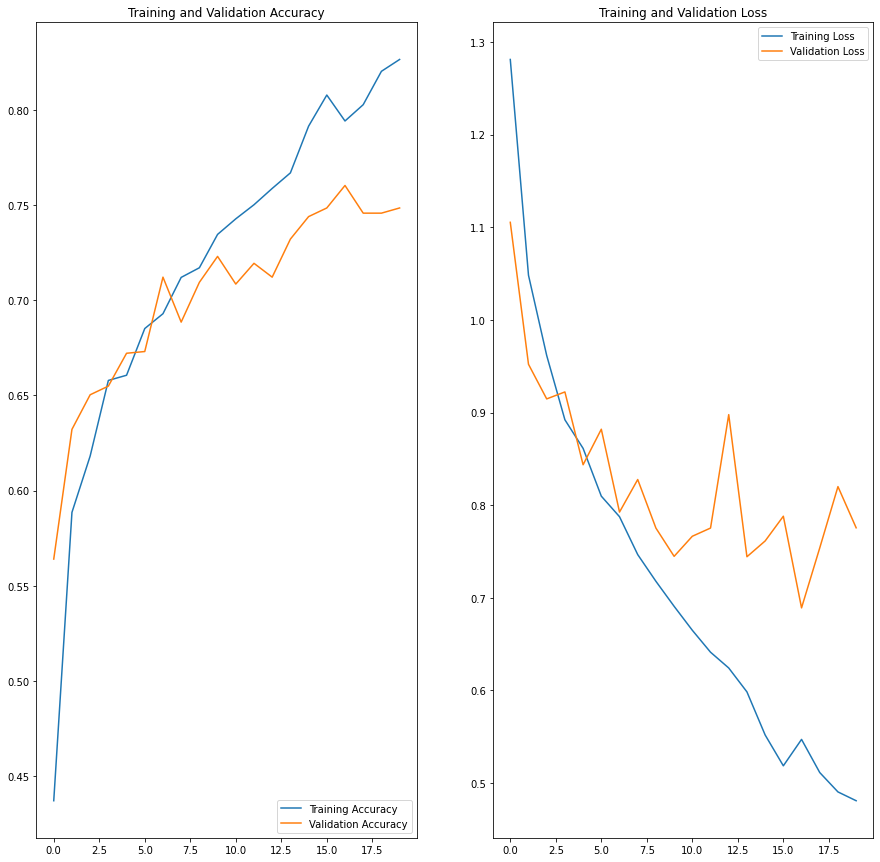

In [214]:
#Training Result after reducing overfitting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [217]:
#prediction/classification of a new flower 
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sunflowers with a 99.94 percent confidence.
